In [134]:
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [120]:
# Leer los archivos CSV y añadir la columna 'Year'
file_paths_years = {
    'data/happiness_2015.csv': 2015,
    'data/happiness_2016.csv': 2016,
    'data/happiness_2017.csv': 2017,
    'data/happiness_2018.csv': 2018,
    'data/happiness_2019.csv': 2019
}

dfs = []
for file_path, year in file_paths_years.items():
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
        df['Year'] = year
        dfs.append(df)
    except Exception as e:
        print(f"Error al leer {file_path}: {e}")

combined_df = pd.concat(dfs, ignore_index=True)

# Traducir los nombres de los países al español
translation = {
    "Afghanistan": "Afganistán",
    "Algeria": "Argelia",
    "Germany": "Alemania",
    "Azerbaijan": "Azerbaiyán",
    "Bangladesh": "Bangladés",
    "Belgium": "Bélgica",
    "Benin": "Benín",
    "Bosnia and Herzegovina": "Bosnia y Herzegovina",
    "Botswana": "Botsuana",
    "Brazil": "Brasil",
    "Cambodia": "Camboya",
    "Cameroon": "Camerún",
    "Canada": "Canadá",
    "Central African Republic": "República Centroafricana",
    "Croatia": "Croacia",
    "Cyprus": "Chipre",
    "Czech Republic": "República Checa",
    "Denmark": "Dinamarca",
    "Djibouti": "Yibuti",
    "Dominican Republic": "República Dominicana",
    "Egypt": "Egipto",
    "Equatorial Guinea": "Guinea Ecuatorial",
    "Eswatini": "Esuatini",
    "Ethiopia": "Etiopía",
    "Finland": "Finlandia",
    "France": "Francia",
    "Gabon": "Gabón",
    "Germany": "Alemania",
    "Greece": "Grecia",
    "Guinea-Bissau": "Guinea-Bisáu",
    "Haiti": "Haití",
    "Hungary": "Hungría",
    "Iceland": "Islandia",
    "Iran": "Irán",
    "Iraq": "Irak",
    "Ireland": "Irlanda",
    "Italy": "Italia",
    "Ivory Coast": "Costa de Marfil",
    "Japan": "Japón",
    "Jordan": "Jordania",
    "Kazakhstan": "Kazajistán",
    "Kenya": "Kenia",
    "Kyrgyzstan": "Kirguistán",
    "Latvia": "Letonia",
    "Lebanon": "Líbano",
    "Lesotho": "Lesoto",
    "Libya": "Libia",
    "Lithuania": "Lituania",
    "Luxembourg": "Luxemburgo",
    "Madagascar": "Madagascar",
    "Malawi": "Malaui",
    "Malaysia": "Malasia",
    "Maldives": "Maldivas",
    "Mali": "Malí",
    "Malta": "Malta",
    "Mauritania": "Mauritania",
    "Mauritius": "Mauricio",
    "Mexico": "México",
    "Moldova": "Moldavia",
    "Mongolia": "Mongolia",
    "Montenegro": "Montenegro",
    "Morocco": "Marruecos",
    "Mozambique": "Mozambique",
    "Myanmar": "Birmania",
    "Namibia": "Namibia",
    "Nepal": "Nepal",
    "Netherlands": "Países Bajos",
    "New Zealand": "Nueva Zelanda",
    "Nicaragua": "Nicaragua",
    "Niger": "Níger",
    "Nigeria": "Nigeria",
    "North Macedonia": "Macedonia del Norte",
    "Norway": "Noruega",
    "Oman": "Omán",
    "Pakistan": "Pakistán",
    "Palestinian Territories": "Territorios Palestinos",
    "Panama": "Panamá",
    "Papua New Guinea": "Papúa Nueva Guinea",
    "Paraguay": "Paraguay",
    "Peru": "Perú",
    "Philippines": "Filipinas",
    "Poland": "Polonia",
    "Portugal": "Portugal",
    "Qatar": "Catar",
    "Romania": "Rumania",
    "Russia": "Rusia",
    "Rwanda": "Ruanda",
    "Saudi Arabia": "Arabia Saudita",
    "Senegal": "Senegal",
    "Serbia": "Serbia",
    "Sierra Leone": "Sierra Leona",
    "Singapore": "Singapur",
    "Slovakia": "Eslovaquia",
    "Slovenia": "Eslovenia",
    "Somalia": "Somalia",
    "South Africa": "Sudáfrica",
    "South Korea": "Corea del Sur",
    "South Sudan": "Sudán del Sur",
    "Spain": "España",
    "Sri Lanka": "Sri Lanka",
    "Sudan": "Sudán",
    "Suriname": "Surinam",
    "Sweden": "Suecia",
    "Switzerland": "Suiza",
    "Syria": "Siria",
    "Tajikistan": "Tayikistán",
    "Tanzania": "Tanzania",
    "Thailand": "Tailandia",
    "Togo": "Togo",
    "Trinidad and Tobago": "Trinidad y Tobago",
    "Tunisia": "Túnez",
    "Turkey": "Turquía",
    "Turkmenistan": "Turkmenistán",
    "Uganda": "Uganda",
    "Ukraine": "Ucrania",
    "United Arab Emirates": "Emiratos Árabes Unidos",
    "United Kingdom": "Reino Unido",
    "United States": "Estados Unidos",
    "Uruguay": "Uruguay",
    "Uzbekistan": "Uzbekistán",
    "Venezuela": "Venezuela",
    "Vietnam": "Vietnam",
    "Yemen": "Yemen",
    "Zambia": "Zambia",
    "Zimbabwe": "Zimbabue"

    # Agrega más traducciones según sea necesario
}
combined_df["Country"] = combined_df["Country"].replace(translation)

# Transformar el dataset a formato ancho
# Usamos "Country" y "Year" para pivotear; el resto de variables se extenderán a columnas con el año en su nombre.
df_wide = combined_df.set_index(["Country", "Year"]).unstack("Year")

# Aplanar el MultiIndex de las columnas: cada columna será "Variable Año"
df_wide.columns = [f"{var} {year}" for var, year in df_wide.columns]
df_wide.reset_index(inplace=True)

# Guardar el dataset final
output_file = "data_2/happiness_wide.csv"
df_wide.to_csv(output_file, index=False, encoding="utf-8")
print(f"El dataset final se ha guardado en {output_file}")

El dataset final se ha guardado en data_2/happiness_wide.csv


In [132]:
df_wide.duplicated().sum()

np.int64(0)

In [122]:
# Cargar el dataset original
file_path = "data_2/happiness_wide.csv"
df = pd.read_csv(file_path)

# Eliminar columnas irrelevantes
columnas_a_eliminar = [col for col in df.columns if 
                       "Region" in col or 
                       "Happiness_Rank" in col or 
                       "Standard_Error" in col or 
                       "Economy_(GDP_per_Capita)" in col or 
                       "Health_(Life_Expectancy)" in col or 
                       "Dystopia_Residual" in col or 
                       "Lower_Confidence_Interval" in col or 
                       "Upper_Confidence_Interval" in col or 
                       "Upper_Confidence_Interval" in col or
                       "Whisker_low" in col or 
                       "Whisker_high" in col or
                       "Overall_rank" in col]

df_cleaned = df.drop(columns=columnas_a_eliminar)

# Renombrar la columna "Country" a "Country Name"
df_cleaned.rename(columns={"Country": "Country Name"}, inplace=True)

# Asegurar que todas las columnas numéricas sean del tipo correcto
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')

# Obtener columnas numéricas después de la conversión
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Aplicar regresión lineal para predecir valores faltantes en series temporales
for base_col in set(col.rsplit(' ', 1)[0] for col in numeric_columns):
    col_years = sorted([col for col in numeric_columns if col.startswith(base_col)])

    if len(col_years) >= 2:  # Solo aplicar si hay al menos dos años con datos
        years = np.array([int(col.split()[-1]) for col in col_years]).reshape(-1, 1)
        
        for idx, row in df_cleaned.iterrows():
            values = row[col_years].values.astype(float)
            
            if np.isnan(values).sum() > 0:  # Solo si hay valores nulos
                known_years = years[~np.isnan(values)].reshape(-1, 1)
                known_values = values[~np.isnan(values)].reshape(-1, 1)

                if len(known_values) >= 2:  # Se necesita al menos 2 valores para la regresión
                    model = LinearRegression()
                    model.fit(known_years, known_values)

                    missing_years = years[np.isnan(values)].reshape(-1, 1)
                    predicted_values = model.predict(missing_years).flatten()

                    for col, pred in zip(col_years, predicted_values):
                        df_cleaned.at[idx, col] = pred

# Aplicar interpolación lineal para los valores faltantes en cada país
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].interpolate(method='linear', axis=1)

# Rellenar cualquier valor nulo restante con la media de la columna
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].mean())

# Guardar el dataset limpio
output_path = "data_2/happiness_cleaned.csv"
df_cleaned.to_csv(output_path, index=False)

print(f"Dataset limpio guardado en: {output_path}")

Dataset limpio guardado en: data_2/happiness_cleaned.csv


/var/folders/bd/c6514xtd1zjgq83rf48wyhn00000gn/T/ipykernel_90025/3590458542.py:26: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_cleaned = df_cleaned.apply(pd.to_numeric, errors='ignore')


In [123]:
print(df_cleaned.columns)

Index(['Country Name', 'Happiness_Score 2015', 'Happiness_Score 2016',
       'Happiness_Score 2017', 'Happiness_Score 2018', 'Happiness_Score 2019',
       'Family 2015', 'Family 2016', 'Family 2017', 'Family 2018',
       'Family 2019', 'Freedom 2015', 'Freedom 2016', 'Freedom 2017',
       'Freedom 2018', 'Freedom 2019', 'Trust_(Government_Corruption) 2015',
       'Trust_(Government_Corruption) 2016',
       'Trust_(Government_Corruption) 2017',
       'Trust_(Government_Corruption) 2018',
       'Trust_(Government_Corruption) 2019', 'Generosity 2015',
       'Generosity 2016', 'Generosity 2017', 'Generosity 2018',
       'Generosity 2019'],
      dtype='object')


In [124]:
print(df_cleaned.dtypes)

Country Name                           object
Happiness_Score 2015                  float64
Happiness_Score 2016                  float64
Happiness_Score 2017                  float64
Happiness_Score 2018                  float64
Happiness_Score 2019                  float64
Family 2015                           float64
Family 2016                           float64
Family 2017                           float64
Family 2018                           float64
Family 2019                           float64
Freedom 2015                          float64
Freedom 2016                          float64
Freedom 2017                          float64
Freedom 2018                          float64
Freedom 2019                          float64
Trust_(Government_Corruption) 2015    float64
Trust_(Government_Corruption) 2016    float64
Trust_(Government_Corruption) 2017    float64
Trust_(Government_Corruption) 2018    float64
Trust_(Government_Corruption) 2019    float64
Generosity 2015                   

### Resultados del Clustering con K-Means

Los países han sido agrupados en 4 clusters basados en sus características promedio de felicidad, corrupción, libertad, generosidad y apoyo familiar.

#### Cómo usar estos clusters en la página web?

- Cada país pertenece a un grupo que comparte características similares.
- Podemos asignar etiquetas a los clusters para hacer más fácil la interpretación:
	- Cluster 0: Países con alta felicidad y baja corrupción.
	- Cluster 1: Países con corrupción moderada y libertad media.
	- Cluster 2: Países con baja felicidad y alta corrupción.
	- Cluster 3: Países con alta generosidad pero baja seguridad.

- Cuando un usuario responda las preguntas en la web, su perfil de preferencias se comparará con estos grupos en lugar de todos los países. Esto hará que la recomendación sea más rápida y precisa.

#### Cómo probar el clustering con diferentes números de grupos?

Si quieres cambiar la cantidad de clusters, simplemente ajusta esta línea y vuelve a ejecutar el código:

optimal_k = 5  # Prueba con 5 clusters en lugar de 4

Siguientes pasos
	1.	Definir etiquetas para cada cluster según las características predominantes.
	2.	Crear una función para asignar un usuario a un cluster según sus respuestas.
	3.	Integrar el modelo con la lógica de recomendación en la web.

### Pregunta,Opciones,Valor Numérico (Ejemplo)
- ¿Prefieres un país muy feliz o no te importa?, (Muy feliz / Poco feliz), (2 / -2)
- ¿Quieres un país con baja corrupción?, (Sí / No), (2 / -2)
- ¿Te importa que sea un país familiar?, (Sí / No), (2 / -2)
- ¿Prefieres un país con mucha libertad?, (Sí / No), (2 / -2)
- ¿Te importa la generosidad de la sociedad?, (Sí / No), (2 / -2)

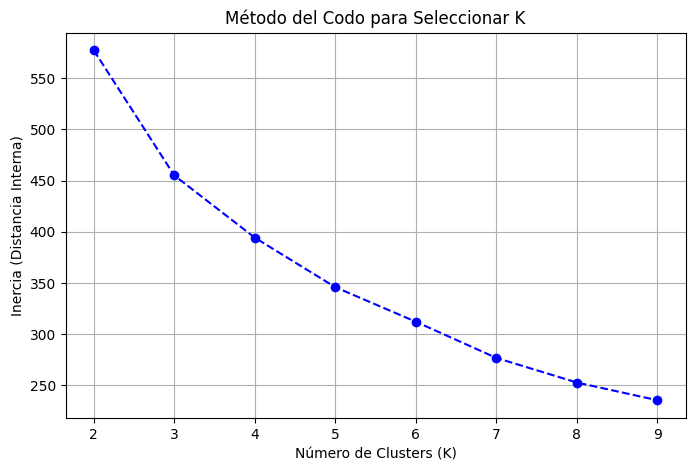

El usuario pertenece al Cluster 3: Países con Alta Generosidad pero Baja Seguridad
Variable    Country Name  Cluster  \
0             Afganistán        0   
1                Albania        0   
2               Alemania        2   
3                 Angola        0   
4         Arabia Saudita        3   
..                   ...      ...   
165              Vietnam        3   
166                Yemen        0   
167               Yibuti        0   
168               Zambia        0   
169             Zimbabue        0   

Variable                                    Cluster Label  
0             Países con Alta Felicidad y Baja Corrupción  
1             Países con Alta Felicidad y Baja Corrupción  
2             Países con Baja Felicidad y Alta Corrupción  
3             Países con Alta Felicidad y Baja Corrupción  
4         Países con Alta Generosidad pero Baja Seguridad  
..                                                    ...  
165       Países con Alta Generosidad pero Baja Segu

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [125]:
# **1. Cargar la base de datos**
file_path = "data_2/happiness_cleaned.csv"  # Asegúrate de cambiarlo según la ruta correcta
df = pd.read_csv(file_path)

# **2. Convertir la base de datos a formato de promedios**
df_long = df.melt(id_vars=["Country Name"], var_name="Variable", value_name="Value")

# Extraer el año de la variable
df_long["Year"] = df_long["Variable"].str.extract(r'(\d{4})')

# Limpiar la columna de la variable eliminando el año
df_long["Variable"] = df_long["Variable"].str.replace(r'\s*\d{4}', '', regex=True)

# Pivotar la tabla para tener un formato más adecuado
df_long = df_long.pivot_table(index=["Country Name", "Year"], columns="Variable", values="Value").reset_index()

# **3. Calcular promedios por país (eliminando la evolución temporal)**
df_avg = df_long.groupby("Country Name").mean(numeric_only=True).reset_index()

# **4. Normalizar los datos**
scaler = StandardScaler()
features = df_avg.drop(columns=["Country Name"])
features_scaled = scaler.fit_transform(features)

# Convertir de nuevo a DataFrame con nombres de columnas originales
df_avg_scaled = df_avg.copy()
df_avg_scaled.iloc[:, 1:] = features_scaled

# **5. Determinar el número óptimo de clusters usando el método del codo**
inertia = []
K_range = range(2, 10)  # Probamos entre 2 y 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_avg_scaled.drop(columns=["Country Name"]))
    inertia.append(kmeans.inertia_)

# Graficar la curva de codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='dashed', color='b')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inercia (Distancia Interna)")
plt.title("Método del Codo para Seleccionar K")
plt.grid(True)
plt.show()

# **6. Aplicar K-Means con el número óptimo de clusters**
optimal_k = 4  # Ajusta este valor basado en la gráfica del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_avg_scaled["Cluster"] = kmeans.fit_predict(df_avg_scaled.drop(columns=["Country Name"]))

# **7. Asignar etiquetas a los clusters**
cluster_labels = {
    0: "Países con Alta Felicidad y Baja Corrupción",
    1: "Países con Corrupción Moderada y Libertad Media",
    2: "Países con Baja Felicidad y Alta Corrupción",
    3: "Países con Alta Generosidad pero Baja Seguridad"
}

df_avg_scaled["Cluster Label"] = df_avg_scaled["Cluster"].map(cluster_labels)

# **8. Función para asignar un usuario a un cluster**
def asignar_cluster_usuario(preferencias, df_scaled, scaler, kmeans_model):
    # Normalizar las preferencias del usuario
    preferencias_scaled = scaler.transform([preferencias])
    
    # Predecir el cluster al que pertenece el usuario
    cluster_predicho = kmeans_model.predict(preferencias_scaled)[0]
    
    # Obtener la etiqueta del cluster
    etiqueta_cluster = cluster_labels[cluster_predicho]
    
    return cluster_predicho, etiqueta_cluster

# **9. Probar el modelo con una entrada de usuario**
preferencias_usuario = np.array([1, 2, -1, 2, 0])  # Ejemplo de respuesta del usuario

# Asignar el usuario a un cluster
cluster_usuario, etiqueta_usuario = asignar_cluster_usuario(preferencias_usuario, df_avg_scaled, scaler, kmeans)

# Mostrar resultados
print(f"El usuario pertenece al Cluster {cluster_usuario}: {etiqueta_usuario}")

# **10. Mostrar los países y sus clusters**
print(df_avg_scaled[["Country Name", "Cluster", "Cluster Label"]])

### Código para convertir respuestas del usuario en recomendaciones

Este código toma las respuestas del usuario, las normaliza y predice a qué cluster pertenece, luego recomienda países dentro de ese cluster.

In [135]:
# **1. Asegurar que el scaler está entrenado**
scaler = StandardScaler()
scaler.fit(df_avg.drop(columns=["Country Name"]))  # Normalizar los datos originales

# **2. Entrenar el modelo K-Means**
optimal_k = 4  # Ajusta según el método del codo
kmeans_optimized = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_optimized.fit(df_avg_scaled.drop(columns=["Country Name"]))

# **3. Función para predecir el cluster del usuario**
def predecir_cluster_usuario(respuestas_usuario, scaler, modelo_clustering, cluster_labels):
    respuestas_usuario = np.array([respuestas_usuario])  # Asegurar que sea 2D
    respuestas_usuario_normalizadas = scaler.transform(respuestas_usuario)
    
    cluster_predicho = modelo_clustering.predict(respuestas_usuario_normalizadas)[0]
    etiqueta_cluster = cluster_labels.get(cluster_predicho, "Cluster desconocido")
    
    return cluster_predicho, etiqueta_cluster

# **4. Respuestas de prueba del usuario**
respuestas_usuario = [2, -2, 2, 0, 1]

# **5. Etiquetas de clusters**
cluster_labels = {
    0: "Países con alta felicidad y baja corrupción",
    1: "Países con corrupción moderada y libertad media",
    2: "Países con baja felicidad y alta corrupción",
    3: "Países con alta generosidad pero baja seguridad"
}

# **6. Predecir el cluster del usuario**
cluster_usuario, etiqueta_usuario = predecir_cluster_usuario(respuestas_usuario, scaler, kmeans_optimized, cluster_labels)

print(f"El usuario pertenece al Cluster {cluster_usuario}: {etiqueta_usuario}")

El usuario pertenece al Cluster 0: Países con alta felicidad y baja corrupción


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### Código para recomendar países dentro del cluster del usuario

Después de identificar el cluster del usuario, podemos recomendar países dentro de ese grupo.

In [ ]:
# **Función para recomendar países dentro del cluster del usuario**
def recomendar_paises_cluster(cluster_predicho, df_clusters):
    """
    Devuelve una lista de países dentro del cluster asignado al usuario.
    
    - cluster_predicho: Número del cluster al que pertenece el usuario
    - df_clusters: DataFrame con la lista de países y su cluster
    """
    
    # Filtrar los países que pertenecen al mismo cluster que el usuario
    paises_recomendados = df_clusters[df_clusters["Cluster Optimizado"] == cluster_predicho]["Country Name"].tolist()
    
    return paises_recomendados[:5]  # Devolver los 5 primeros países como recomendación

# **Obtener recomendaciones basadas en el cluster del usuario**
paises_recomendados = recomendar_paises_cluster(cluster_usuario, df_avg_scaled)

print("Países recomendados:", paises_recomendados)

### formato Long
   
1.	Convierte la base de datos a formato long: Se reorganizan los datos para que cada país tenga varias filas (una por año).
2.	Normaliza las variables: Escala los valores de cada indicador para que el modelo funcione correctamente.
3.	Entrena el modelo KNN: Usa el algoritmo K-Nearest Neighbors (KNN) para encontrar los países más cercanos según las características.
4.	Crea una función de recomendación: Permite ingresar preferencias (ejemplo: felicidad alta, corrupción baja) y sugiere países similares.
5.	Ejecuta una prueba con datos de usuario: Evalúa la recomendación con una entrada de ejemplo.

Puedes modificar preferencias_usuario para ingresar tus propias preferencias y probar diferentes escenarios.

In [126]:
# Cargar la base de datos
file_path = "data_2/happiness_cleaned.csv"
df = pd.read_csv(file_path)

# **1. Convertir la base de datos a formato long**
df_long = df.melt(id_vars=["Country Name"], var_name="Variable", value_name="Value")

# Extraer el año de la variable
df_long["Year"] = df_long["Variable"].str.extract(r'(\d{4})')

# Limpiar la columna de la variable eliminando el año
df_long["Variable"] = df_long["Variable"].str.replace(r'\s*\d{4}', '', regex=True)

# Pivotar para tener un formato más adecuado
df_long = df_long.pivot_table(index=["Country Name", "Year"], columns="Variable", values="Value").reset_index()

# **2. Normalizar los datos**
scaler = StandardScaler()
features = df_long.drop(columns=["Country Name", "Year"])
features_scaled = scaler.fit_transform(features)

# Convertir de nuevo a DataFrame con nombres de columnas originales
df_long_scaled = df_long.copy()
df_long_scaled.iloc[:, 2:] = features_scaled

# **3. Aplicar pesos a las variables**
# Definir pesos personalizados (se pueden ajustar)
weights = {
    "Happiness_Score": 2.0,  # Más peso a felicidad
    "Trust_(Government_Corruption)": 2.0,  # Más peso a baja corrupción
    "Family": 1.0,
    "Freedom": 1.0,
    "Generosity": 1.0
}

# Aplicar los pesos a las columnas correspondientes
for col in weights.keys():
    df_long_scaled[col] *= weights[col]

# **4. Entrenar el modelo K-Nearest Neighbors (KNN)**
knn = NearestNeighbors(n_neighbors=10, metric='euclidean')  # Aumentamos vecinos para más opciones únicas
knn.fit(df_long_scaled.drop(columns=["Country Name", "Year"]))

# **5. Función para recomendar países basados en preferencias del usuario con pesos ajustados**
def recomendar_paises(preferencias, df_scaled, scaler, knn_model, df_original):
    # Normalizar las preferencias del usuario
    preferencias_scaled = scaler.transform([preferencias])
    
    # Aplicar los pesos a las preferencias igual que en los datos
    for i, col in enumerate(weights.keys()):
        preferencias_scaled[0][i] *= weights[col]
    
    # Encontrar los países más cercanos
    distancias, indices = knn_model.kneighbors(preferencias_scaled)
    
    # Obtener los nombres de los países recomendados
    paises_recomendados = df_original.iloc[indices[0]]["Country Name"].values

    # Eliminar duplicados y devolver los 5 primeros países únicos
    paises_unicos = list(dict.fromkeys(paises_recomendados))[:5]

    return paises_unicos

# **6. Probar el modelo con una entrada de usuario (priorizando felicidad y baja corrupción)**
preferencias_usuario = np.array([2, 0, -1, 2, -2])  # Familia media, alta libertad, felicidad muy alta, baja corrupción

# Obtener recomendaciones ajustadas
paises_sugeridos = recomendar_paises(preferencias_usuario, df_long_scaled, scaler, knn, df_long_scaled)

# Mostrar recomendaciones corregidas
print("Países recomendados:", paises_sugeridos)

Países recomendados: ['Grecia', 'Bulgaria', 'Lituania', 'Ucrania']


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [127]:
# **1. Cargar la base de datos**
file_path = "data_2/happiness_cleaned.csv"  # Asegúrate de cambiarlo a la ruta correcta en tu máquina
df = pd.read_csv(file_path)

# **2. Convertir la base de datos a formato de promedios**
df_long = df.melt(id_vars=["Country Name"], var_name="Variable", value_name="Value")

# Extraer el año de la variable
df_long["Year"] = df_long["Variable"].str.extract(r'(\d{4})')

# Limpiar la columna de la variable eliminando el año
df_long["Variable"] = df_long["Variable"].str.replace(r'\s*\d{4}', '', regex=True)

# Pivotar la tabla para tener un formato más adecuado
df_long = df_long.pivot_table(index=["Country Name", "Year"], columns="Variable", values="Value").reset_index()

# **3. Calcular promedios por país (eliminando la evolución temporal)**
df_avg = df_long.groupby("Country Name").mean(numeric_only=True).reset_index()

# **4. Normalizar los datos**
scaler = StandardScaler()
features = df_avg.drop(columns=["Country Name"])
features_scaled = scaler.fit_transform(features)

# Convertir de nuevo a DataFrame con nombres de columnas originales
df_avg_scaled = df_avg.copy()
df_avg_scaled.iloc[:, 1:] = features_scaled

# **5. Aplicar pesos a las variables**
weights = {
    "Happiness_Score": 2.0,  # Más peso a felicidad
    "Trust_(Government_Corruption)": 2.0,  # Más peso a baja corrupción
    "Family": 1.0,
    "Freedom": 1.0,
    "Generosity": 1.0
}

# Aplicar los pesos a las columnas correspondientes
for col in weights.keys():
    if col in df_avg_scaled.columns:
        df_avg_scaled[col] *= weights[col]

# **6. Entrenar el modelo K-Nearest Neighbors (KNN)**
knn_avg = NearestNeighbors(n_neighbors=10, metric='euclidean')  # Aumentamos vecinos para más diversidad
knn_avg.fit(df_avg_scaled.drop(columns=["Country Name"]))

# **7. Función para recomendar países basados en datos promediados**
def recomendar_paises_promedio(preferencias, df_scaled, scaler, knn_model, df_original):
    # Normalizar las preferencias del usuario
    preferencias_scaled = scaler.transform([preferencias])
    
    # Aplicar los mismos pesos a las preferencias
    for i, col in enumerate(weights.keys()):
        if col in df_scaled.columns:
            preferencias_scaled[0][i] *= weights[col]
    
    # Encontrar los países más cercanos
    distancias, indices = knn_model.kneighbors(preferencias_scaled)
    
    # Obtener los nombres de los países recomendados
    paises_recomendados = df_original.iloc[indices[0]]["Country Name"].values

    # Eliminar duplicados y devolver los 5 primeros países únicos
    paises_unicos = list(dict.fromkeys(paises_recomendados))[:5]

    return paises_unicos

# **8. Probar el modelo con una entrada de usuario (priorizando felicidad y baja corrupción)**
preferencias_usuario = np.array([0, 1, 0, 2, 2])  # Familia media, alta libertad, felicidad muy alta, baja corrupción

# Obtener recomendaciones ajustadas con datos promediados
paises_sugeridos_promedio = recomendar_paises_promedio(preferencias_usuario, df_avg_scaled, scaler, knn_avg, df_avg_scaled)

# Mostrar recomendaciones
print("Países recomendados:", paises_sugeridos_promedio)

Países recomendados: ['Ruanda', 'Somaliland region', 'Singapur', 'Somaliland Region', 'Somalia']


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [128]:
df_long

Variable,Country Name,Year,Family,Freedom,Generosity,Happiness_Score,Trust_(Government_Corruption)
0,Afganistán,2015,0.302850,0.234140,0.365100,3.575,0.097190
1,Afganistán,2016,0.110370,0.164300,0.312680,3.360,0.071120
2,Afganistán,2017,0.581543,0.106180,0.311871,3.794,0.061158
3,Afganistán,2018,0.537000,0.085000,0.191000,3.632,0.036000
4,Afganistán,2019,0.517000,0.000000,0.158000,3.203,0.025000
...,...,...,...,...,...,...,...
845,Zimbabue,2015,1.032760,0.258610,0.189870,4.610,0.080790
846,Zimbabue,2016,0.714780,0.254290,0.185030,4.193,0.085820
847,Zimbabue,2017,1.083096,0.336384,0.189143,3.875,0.095375
848,Zimbabue,2018,1.094000,0.406000,0.132000,3.692,0.099000


In [129]:
# Ruta de la carpeta donde están los archivos CSV
folder_path = "/Users/kathelopez/Desktop/5_Entregable_Grupal/Proyecto-Final-UE/data"

# Lista de archivos que NO queremos incluir en la unión
archivos_excluidos = ["happiness_2015.csv", "happiness_2016.csv", "happiness_2017.csv",
                      "happiness_2018.csv", "happiness_2019.csv"]

# Lista para almacenar los DataFrames
dfs = []

# Iterar sobre los archivos en la carpeta
for file in os.listdir(folder_path):
    if file.endswith(".csv") and file not in archivos_excluidos:
        file_path = os.path.join(folder_path, file)  # Obtener la ruta completa

        try:
            # Intentar cargar el CSV con UTF-8, si falla, probar con Latin-1
            try:
                df = pd.read_csv(file_path, encoding="utf-8", sep=",", on_bad_lines="skip")
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding="latin1", sep=",", on_bad_lines="skip")

            # Verificar si "Country Name" está presente, si no, revisar si existe "Country"
            if "Country Name" in df.columns:
                dfs.append(df)
            elif "Country" in df.columns:
                df.rename(columns={"Country": "Country Name"}, inplace=True)
                dfs.append(df)
            else:
                print(f"⚠️ {file} no tiene la columna 'Country Name' ni 'Country'. Archivo omitido.")

        except Exception as e:
            print(f"❌ Error al leer {file}: {e}")

# Verificar si se cargaron archivos correctamente
if dfs:
    # Unir todos los DataFrames en uno solo
    df_final = pd.concat(dfs, ignore_index=True)

    # Guardar el archivo final en "data_2"
    output_path = "data_2/country_find.csv"
    df_final.to_csv(output_path, index=False)

    print(f"✅ CSV final generado exitosamente: {output_path}")
else:
    print("⚠️ No se pudieron cargar archivos válidos.")

✅ CSV final generado exitosamente: data_2/country_find.csv


In [130]:
country_find = pd.read_csv('data_2/country_find.csv')

In [131]:
print(country_find.dtypes)

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2020              float64
2021              float64
2022              float64
2023              float64
Unnamed: 68       float64
Length: 69, dtype: object
